In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_attack_analysis[1].csv to heart_attack_analysis[1].csv


In [ ]:
import pandas as pd

data=pd.read_csv('heart_attack_analysis[1].csv')

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
for feature in data.columns:
  print(feature,":" ,len(data[feature].unique()))

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


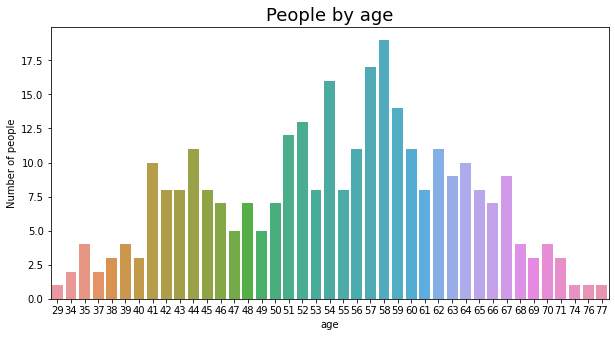

In [ ]:
# Considering Factor Age
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x="age",data=data)
plt.title("People by age",fontsize=18)
plt.ylabel("Number of people")
plt.show()

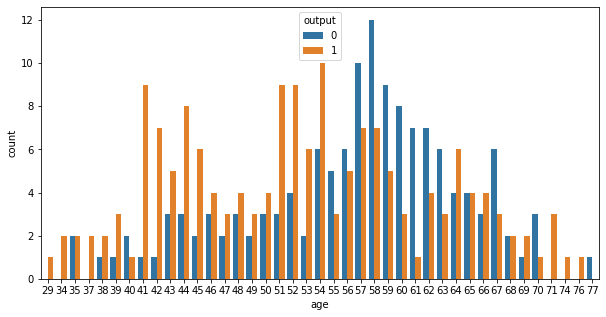

In [ ]:
# Considering Factor Age
plt.figure(figsize = (10,5))
sns.countplot(x=data['age'],hue =data['output'])

Text(0.5, 0, 'Gender')

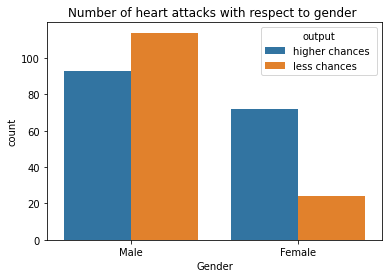

In [ ]:
# Considering Factor Gender
gender = data.sex.map({1: 'Male', 0: 'Female'})
target = data.output.map({1: 'higher chances ', 0: 'less chances '})
sns.countplot(x=gender,hue=target, data = data)
plt.title("Number of heart attacks with respect to gender ");
plt.xlabel("Gender")


In [ ]:
# Regression Algorithm- Logisitic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
prediction=logreg.predict(X_test)
prediction

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0])

In [ ]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,prediction))
print("\n Accuracy Score:",metrics.accuracy_score(y_test,prediction))
print("\nClassification Report:\n",metrics.classification_report(y_test,prediction))

Confusion Matrix:
[[30  6]
 [ 7 48]]

 Accuracy Score: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.89      0.87      0.88        55

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

